In [2]:
import os
import pandas as pd
from nixtla import NixtlaClient



NIXTLA_API_KEY = "nixak-dYOdtcALvfQtg2DjR28zS1bdYuor02TkwqWZtpoYfr53giKHz4tYy2uLqbLTsqsoxBBHEY94gcFvTNif"
nixtla_client = NixtlaClient(api_key=NIXTLA_API_KEY)

In [3]:
# Read the dataset
wikipedia = pd.read_csv("https://datasets-nixtla.s3.amazonaws.com/peyton-manning.csv", parse_dates=["ds"])
wikipedia.head(10)

,unique_id,ds,y
0,0,2007-12-10,9.590761
1,0,2007-12-11,8.519590
2,0,2007-12-12,8.183677
3,0,2007-12-13,8.072467
4,0,2007-12-14,7.893572
5,0,2007-12-15,7.783641
6,0,2007-12-16,8.414052
7,0,2007-12-17,8.829226
8,0,2007-12-18,8.382518
9,0,2007-12-19,8.069655


In [4]:
len(wikipedia)

2964

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

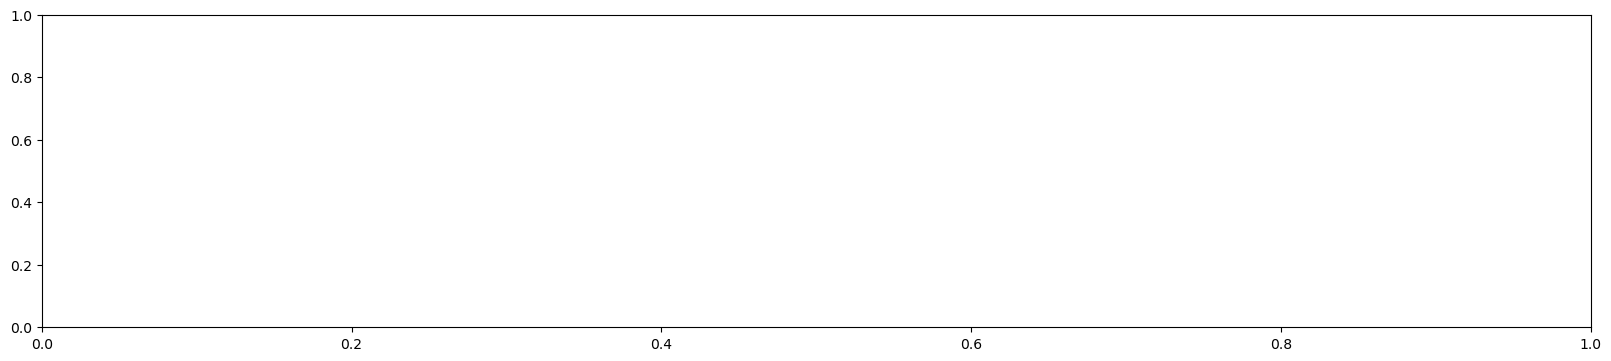

In [3]:
nixtla_client.plot(wikipedia)


In [4]:
anomalies_df = nixtla_client.detect_anomalies(
    wikipedia,
    freq="D",
    model="timegpt-1",
)
anomalies_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


,unique_id,ds,y,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,0,2008-01-10,8.281724,8.224189,9.503589,6.944789,False
1,0,2008-01-11,8.292799,8.151555,9.430955,6.872155,False
2,0,2008-01-12,8.199189,8.127275,9.406675,6.847876,False
3,0,2008-01-13,9.996522,8.917264,10.196664,7.637864,False
4,0,2008-01-14,10.127071,9.002327,10.281727,7.722927,False


In [6]:
anomalies_df_exogenous = nixtla_client.detect_anomalies(
    wikipedia,
    freq="D",
    date_features=["month", "year"],
    date_features_to_one_hot=True,
    model="timegpt-1",
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using the following exogenous features: ['month_1.0', 'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0', 'year_2007.0', 'year_2008.0', 'year_2009.0', 'year_2010.0', 'year_2011.0', 'year_2012.0', 'year_2013.0', 'year_2014.0', 'year_2015.0', 'year_2016.0']
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


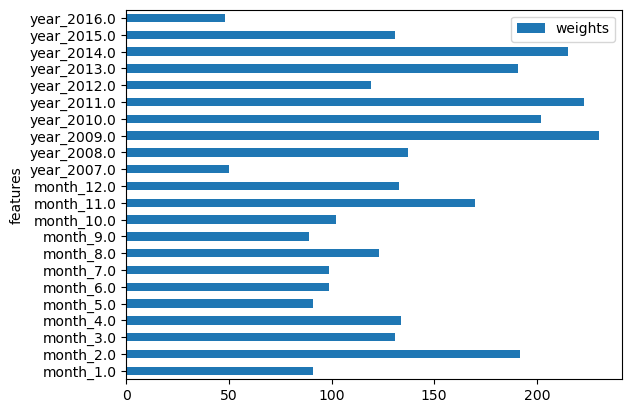

In [7]:
nixtla_client.weights_x.plot.barh(
    x='features',
    y='weights'
)


In [8]:
# Without exogenous features
print("Number of anomalies without exogenous features:", anomalies_df.anomaly.sum())

# With exogenous features
print("Number of anomalies with exogenous features:", anomalies_df_exogenous.anomaly.sum())

Number of anomalies without exogenous features: 89
Number of anomalies with exogenous features: 92


In [9]:
anomalies_df_70 = nixtla_client.detect_anomalies(wikipedia, freq="D", level=70)

# Print and compare anomaly counts
print("Number of anomalies with 99% confidence interval:", anomalies_df.anomaly.sum())
print("Number of anomalies with 70% confidence interval:", anomalies_df_70.anomaly.sum())

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


Number of anomalies with 99% confidence interval: 89
Number of anomalies with 70% confidence interval: 505
